In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [2]:
sales = pd.read_csv('C:\\Users\\Yash\\Desktop\\STATS\\CASE STUDY FOR PANDAS\\6. Pandas Case Study 4 - Python Visualizations Case Study\\SalesData.csv')

In [8]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

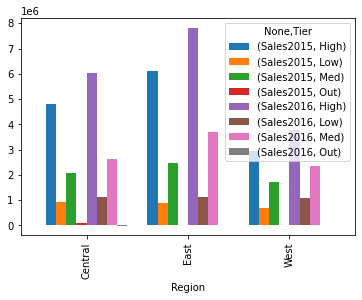

In [9]:



sales.groupby(['Region','Tier'],sort=True).sum()[['Sales2015','Sales2016']].unstack().plot(kind="bar",width = .8)
#sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF0DD7BA88>],
      dtype=object)

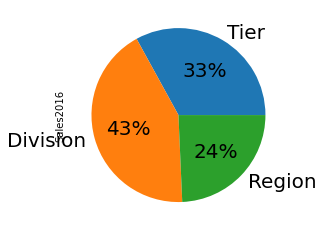

In [10]:
sales_region = sales.groupby('Region')['Sales2016'].sum()#[['Sales2016']].aggregate({})
sales_region.plot(kind='pie', 
            labels=['Tier','Division','Region'],
            autopct='%1.0f%%', 
            fontsize=20, 
            subplots='true')


### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

C:\Users\Yash\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


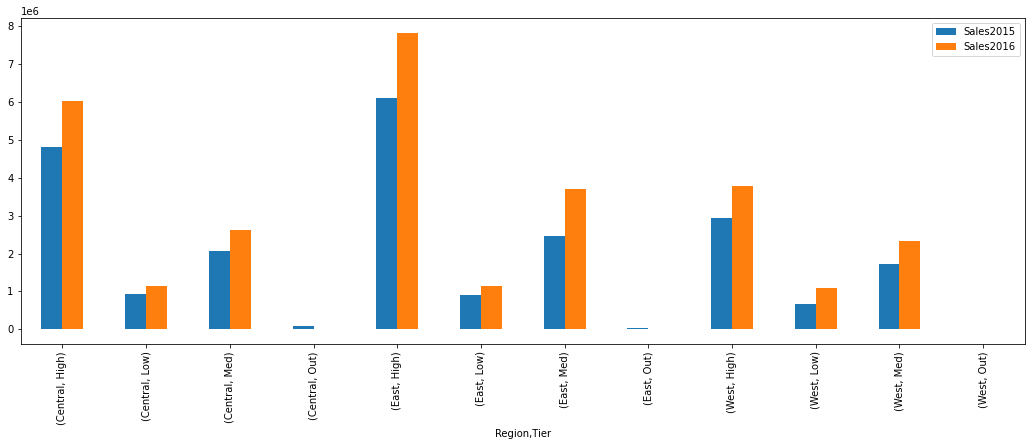

In [11]:
sales_Region_Tiers = sales.groupby(['Region','Tier'])['Sales2015','Sales2016'].sum()#.aggregate({})

sales_Region_Tiers=sales_Region_Tiers.plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

C:\Users\Yash\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


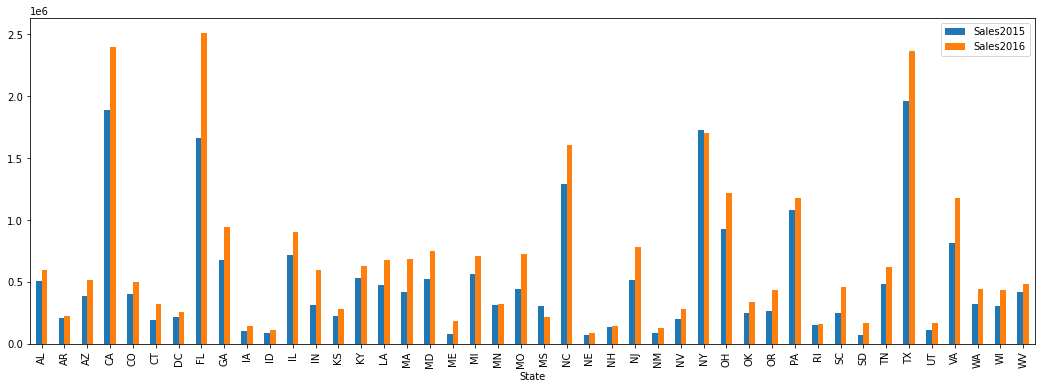

In [13]:
state = sales.loc[(sales.Region == 'East')]
sales1 = sales.groupby('State')['Sales2015','Sales2016'].sum()
sales1
state=sales1.where(sales['Sales2015'] > sales['Sales2016']).notnull()
state
sales_graph=sales1.plot.bar(figsize=(18,6))

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [17]:
sales_High_tier = sales.groupby(['Tier','Division'])['Sales2015','Sales2016'].sum().loc['High']
sales_High_tier

C:\Users\Yash\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales2015,Sales2016
Division,,
BIG APPLE,563638.61,669485.03
CHARGERS,357746.20,485728.16
CONGRESSIONAL,481600.89,591768.57
DIAMONDBACK,422571.32,487963.45
EMPIRE,908479.99,1027031.07
GRIDIRON,499841.12,623601.66
GULF STREAM,507790.52,807835.66
HAILSTORM,515226.63,691777.98
KINETIC,614482.72,667336.37


In [18]:
se=sales_High_tier.where(sales_High_tier['Sales2015'] > sales_High_tier['Sales2016'])
se.head()

,Sales2015,Sales2016
Division,,
BIG APPLE,NaN,NaN
CHARGERS,NaN,NaN
CONGRESSIONAL,NaN,NaN
DIAMONDBACK,NaN,NaN
EMPIRE,NaN,NaN


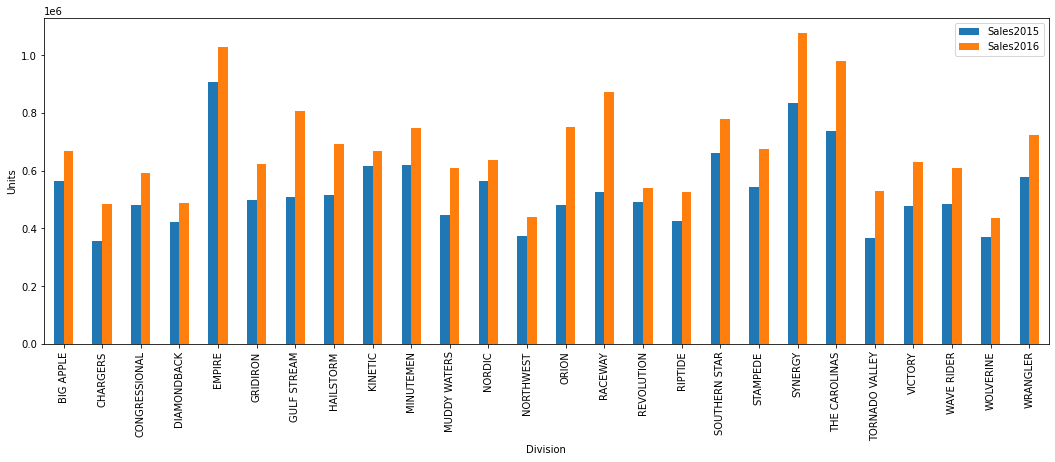

In [49]:
sales_plot_graph=sales_High_tier.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Units')
plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [22]:
sales['Qtr'] = sales['Month'].map(lambda x: pd.Period(x,'Q'))
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,1Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,1Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,1Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,1Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,1Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,1Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,1Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,1Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,1Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


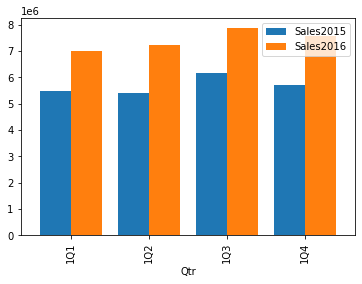

In [23]:
sales.groupby(['Qtr'],sort=True)[['Sales2015','Sales2016']].sum().plot(kind="bar",width = .8)

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF121629C8>],
      dtype=object)

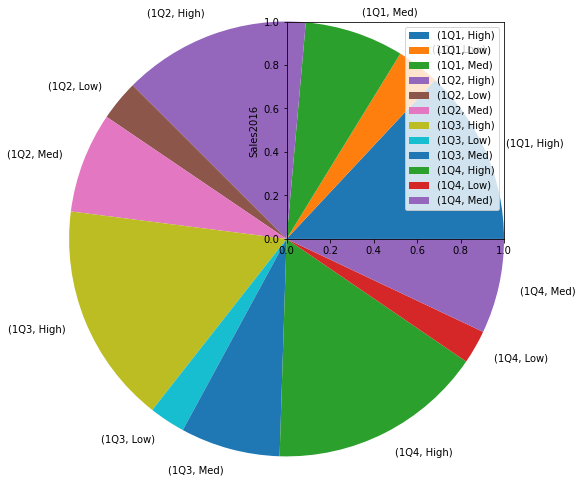

In [32]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

sal=sales.groupby(['Qtr','Tier'])[['Sales2016']].sum()
sal.where(sal.Sales2016 > 0,0).plot.pie(radius=1, frame=True,subplots=True)